<p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction - Facebook Challenge</b> </p>

In [ ]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from pandas import read_hdf
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data_path = 'gdrive/My Drive/Major Project/'

In [ ]:
train_emb, train_y = pickle.load(open(data_path+'train_data_nodesketch91', 'rb'))
print(train_emb.shape, train_y.shape)
test_emb, test_y = pickle.load(open(data_path+'test_data_nodesketch91', 'rb'))
print(test_emb.shape, test_y.shape)

(902474, 64) (902474,)
(106363, 64) (106363,)


In [ ]:
#reading
df_final_train = read_hdf(data_path + 'fea_sample/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf(data_path + 'fea_sample/storage_sample_stage4.h5', 'test_df',mode='r')

In [ ]:
df_final_train.shape

(902474, 59)

In [ ]:
y_train = df_final_train.link
y_test = df_final_test.link

In [ ]:
df_final_train.drop(['src', 'dest','link'],axis=1,inplace=True)
df_final_test.drop(['src', 'dest','link'],axis=1,inplace=True)

In [ ]:
# Heuristic only
%%time
clf = LGBMClassifier(learning_rate=0.01, max_depth=15, n_estimators=160, random_state=25)
clf.fit(df_final_train, train_y)
train_sc = f1_score(train_y,clf.predict(df_final_train))
test_sc = f1_score(test_y,clf.predict(df_final_test))
print('Train Score',train_sc,'test Score',test_sc)

Train Score 0.9772577484662305 test Score 0.9504062813840956
CPU times: user 1min 46s, sys: 200 ms, total: 1min 46s
Wall time: 1min 3s


In [ ]:
# NodeSketch only
clf = XGBClassifier(max_depth=7, n_estimators=100, n_jobs=-1,
              random_state=25)
clf.fit(train_emb, train_y)
train_sc = f1_score(train_y,clf.predict(train_emb))
test_sc = f1_score(test_y,clf.predict(test_emb))
print('Train Score',train_sc,'test Score',test_sc)

NameError: ignored

In [ ]:
# NodeSketch only
clf = RandomForestClassifier(max_depth=12, n_estimators=100, n_jobs=-1,
              random_state=25)
clf.fit(train_emb, train_y)
train_sc = f1_score(train_y,clf.predict(train_emb))
test_sc = f1_score(test_y,clf.predict(test_emb))
print('Train Score',train_sc,'test Score',test_sc)

Train Score 0.8055158702836684 test Score 0.8191895361343372


In [ ]:
# NodeSketch only
clf = LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100, subsample_for_bin=200000, 
                     objective=None, class_weight=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0, 
                     subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=None, n_jobs=- 1, importance_type='split')
clf.fit(train_emb, train_y)
train_sc = f1_score(train_y,clf.predict(train_emb))
test_sc = f1_score(test_y,clf.predict(test_emb))
print('Train Score',train_sc,'test Score',test_sc)

NameError: ignored

In [ ]:
# Heuristic only
clf = XGBClassifier(max_depth=7, n_estimators=100, n_jobs=-1,
              random_state=25)f
clf.fit(df_final_train,y_train)
train_sc = f1_score(y_train,clf.predict(df_final_train))
test_sc = f1_score(y_test,clf.predict(df_final_test))
print('Train Score',train_sc,'test Score',test_sc)

Train Score 0.983029655226594 test Score 0.9458179808400884


In [ ]:
# Heuristic only
clf = RandomForestClassifier(max_depth=12, n_estimators=100, n_jobs=-1,
              random_state=25)
clf.fit(df_final_train,y_train)
train_sc = f1_score(y_train,clf.predict(df_final_train))
test_sc = f1_score(y_test,clf.predict(df_final_test))
print('Train Score',train_sc,'test Score',test_sc)

Train Score 0.9771341261464953 test Score 0.9465713006860139


In [ ]:
# Heuristic only
clf = LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100, subsample_for_bin=200000, 
                     objective=None, class_weight=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0, 
                     subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=None, n_jobs=- 1, importance_type='split')
clf.fit(df_final_train,y_train)
train_sc = f1_score(y_train,clf.predict(df_final_train))
test_sc = f1_score(y_test,clf.predict(df_final_test))
print('Train Score',train_sc,'test Score',test_sc)

Train Score 0.9832426574663836 test Score 0.9469947114279144


In [ ]:
df_final_train = np.hstack((df_final_train, train_emb))
print(df_final_train.shape)
df_final_test = np.hstack((df_final_test, test_emb))
print(df_final_test.shape)

(902474, 120)
(106363, 120)


In [ ]:
# Heuristic + NodeSketch
clf = XGBClassifier(max_depth=7, n_estimators=100, n_jobs=-1,
              random_state=25)
clf.fit(df_final_train,y_train)
train_sc = f1_score(y_train,clf.predict(df_final_train))
test_sc = f1_score(y_test,clf.predict(df_final_test))
print('Train Score',train_sc,'test Score',test_sc)

Train Score 0.983071290018822 test Score 0.945929766717934


In [ ]:
# Heuristic + NodeSketch
clf = RandomForestClassifier(max_depth=12, n_estimators=100, n_jobs=-1,
              random_state=25)
clf.fit(df_final_train,y_train)
train_sc = f1_score(y_train,clf.predict(df_final_train))
test_sc = f1_score(y_test,clf.predict(df_final_test))
print('Train Score',train_sc,'test Score',test_sc)

Train Score 0.9740912011838966 test Score 0.9400686503056224


In [ ]:
# Heuristic + NodeSketch
clf = LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100, subsample_for_bin=200000, 
                     objective=None, class_weight=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0, 
                     subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=None, n_jobs=- 1, importance_type='split')
clf.fit(df_final_train,y_train)
train_sc = f1_score(y_train,clf.predict(df_final_train))
test_sc = f1_score(y_test,clf.predict(df_final_test))
print('Train Score',train_sc,'test Score',test_sc)

Train Score 0.983167768283391 test Score 0.9474826229267036


In [ ]:
%%time
clf = LGBMClassifier(learning_rate=0.01, max_depth=15, n_estimators=160, random_state=25)
clf.fit(df_final_train, train_y)
train_sc = f1_score(train_y,clf.predict(df_final_train))
test_sc = f1_score(test_y,clf.predict(df_final_test))
print('Train Score',train_sc,'test Score',test_sc)

Train Score 0.9772577484662305 test Score 0.9504062813840956
CPU times: user 3min 11s, sys: 330 ms, total: 3min 11s
Wall time: 1min 41s


In [ ]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


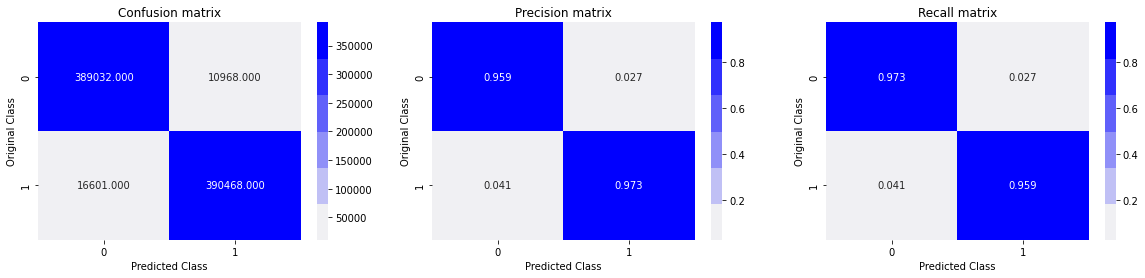

Test confusion_matrix


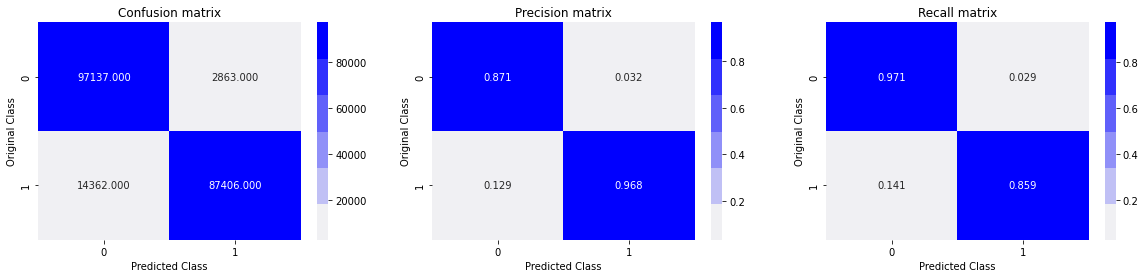

In [ ]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

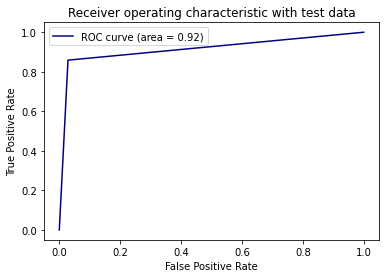

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

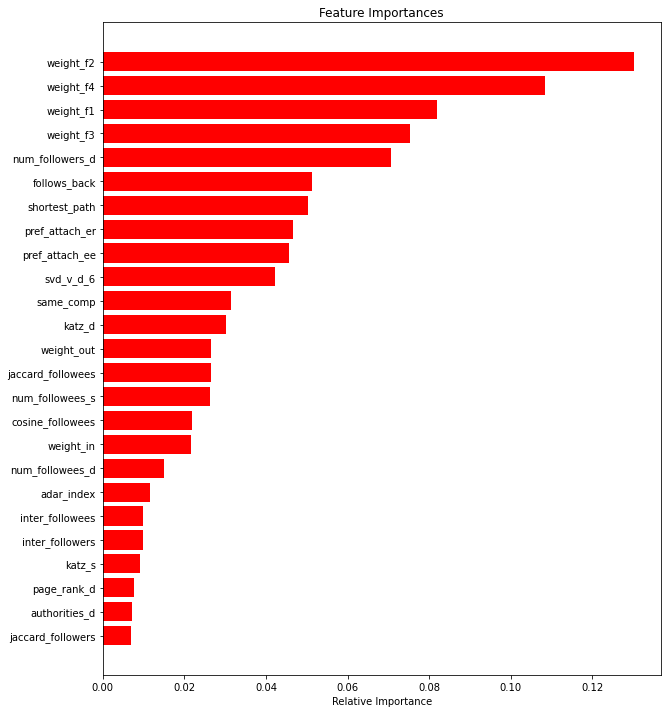

In [ ]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

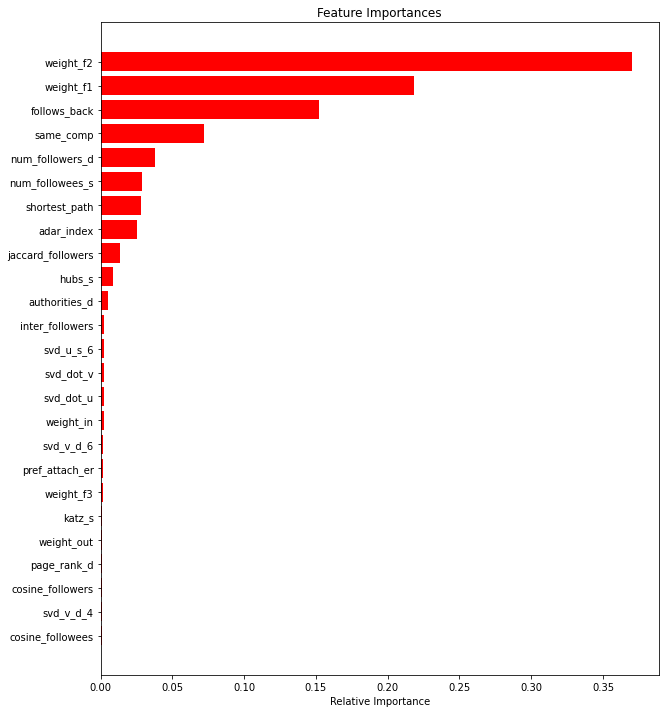

In [ ]:
features = df_final_train.columns
importances = x_clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Step-by-step analysis

## Part 1 - EDA

#### 1) Analysing the 'follower' trends by plotting the distribution of the number of followers of each user

#### 2) Analysing the 'followee' trends by plotting the distribution of the number of followees of each user

#### 3) Analyizing as above for the aggregate of the number of followers and followees of each user

## Part 2 - Mapping into a classification problem

#### 1) Generating pairs of users without edges
The original data had information only about the links that were already present hence it wasn't adequate for training any model. Here we have taken random pairs of users amd added them to the data if there is no edge between them already and the shortest path length between them is more than 2. 

#### 2) Splitting into train and test data
This is done for two sets (the data in which the edges exist and that in which the don't), before combining the two to get the final training data. The training data of the points between which links actually exist, shall be used later.

## Part 3 - Feature engineering

### 1) Generating features

#### a) Similarity measures 
Jaccard distance and cosine distance (calculated by using graph attributes of the training graph containing user pairs with actual links)

#### b) Ranking features
PageRank (using nx.pagerank)

#### c) Graph related features
Shortest path, presence in same community (of weakly connected components), adar index, preferrential attachment, if the destination user follows back or not. All these are calculated by using graph attributes of the training graph containing user pairs with actual links.
<br>
Katz centrality (using nx.katz.katz_centrality), HITS score (using nx.hits)
Number of followers and followees of source and destination node, as well as the commonality bwteen these measures.

#### d) Weight features
Various combination of weights of source and destination nodes (fundamentally a metric of incoming and outgoing nodes to indicate influence)

#### e) SVD features
SVD features of length 6 are generated for all the points and are added as 6 features in each case. The dot products of the source and destination node U and VT vectors are also added as features.

### 2) Adding the features to the data 
This is done using row operations on the data set with lambda functions employing the functions created above to generate the concerned features

## Part - 4 Modelling
We first drop the features of 'src', 'dest' and 'indicator_link'

## 1) Hyperparameter tuning

#### a) Single feature estimate
In this process, we are tuning the model only for a single feature keeping the others constant (for example max_depth in RandomForest and XGBClassifier, and later n_estimators)

#### b) RandomSearchCV
We are using the most suitable interval of values for the features found in the previous step and are running RandomSearchCV to fing the best set of parameters

### 2) Visualization of results

#### a) Plotting of the confusion matrix

#### b) Plotting of the roc_auc curve

### 3) Checking feature importance
Using the feature importances attribute of the classiifer, observing which fetaures are most influencial

## Conclusion
1) The XGBoost classifier works marginally better than the Random Forest classifier
<br>
2) According to both the classisifers, the most important feature to determine whether a will follow b is the 'follows back' feature whixh tells us if b follows a or not.
<br>
3) The Random Forest method indicates that many features such as 'cosine distance', various weight features, 'shortest path', 'preferrential attachment' have similar and significant importance with many other features such as 'Jaccard distance' and 'Adar index' not far behind.
<br>
4) The XGBoost classifier tells a different story. The 'follows back' feature takes most of the relative feature importance and the only other majorly significant feature is the cosine distance of followers. The other features don't have nearly as much influnce as these two.
<br>
5) Features such as 'PageRank', 'Katz centrality', 'HITS score', and most SVD features have little importance compared to the features meantioned above.